## Imports

# Goal: What chess opening for white would result in a higher win percentage

In the chess community, it is often believed that playing as White does not necessarily confer a meaningful advantage, despite having the first move. Many players argue that, in practice, the choice of opening for White rarely leads to a decisive edge, and that outcomes are more influenced by player skill and subsequent play. This analysis seeks to put that belief to the test by examining whether any particular White opening can provide a measurable advantage and increase the likelihood of winning. By analysing a large dataset of historical chess games, this project aims to determine if the first-move initiative can be translated into real results, or if the supposed advantage of playing as White is largely a myth

In [1]:
import pandas as pd
import os
import numpy as np

# Step 1: Dataset path from download
dataset_path = "/Users/husnainsyed/.cache/kagglehub/datasets/arevel/chess-games/versions/1"

# Find the CSV file
csv_file = next(f for f in os.listdir(dataset_path) if f.endswith(".csv"))
csv_path = os.path.join(dataset_path, csv_file)

# Load a memory-friendly subset (all columns)
df = pd.read_csv(
    csv_path 
)




In [2]:
df.dtypes


Event               object
White               object
Black               object
Result              object
UTCDate             object
UTCTime             object
WhiteElo             int64
BlackElo             int64
WhiteRatingDiff    float64
BlackRatingDiff    float64
ECO                 object
Opening             object
TimeControl         object
Termination         object
AN                  object
dtype: object

In [3]:
# Count NaNs in the column
nan_count = df.isna().sum()
print(f"Number of missing WhiteRatingDiff values: {nan_count}")


Number of missing WhiteRatingDiff values: Event                 0
White                 0
Black                 0
Result                0
UTCDate               0
UTCTime               0
WhiteElo              0
BlackElo              0
WhiteRatingDiff    4668
BlackRatingDiff    4668
ECO                   0
Opening               0
TimeControl           0
Termination           0
AN                    0
dtype: int64


In [4]:
# Show rows where WhiteRatingDiff is NaN in the original df
df_nan = df[df['WhiteRatingDiff'].isna()]
print(df_nan.head())  # show first few rows
print(df_nan.index.tolist())  # indices of the NaN rows


            Event               White           Black Result     UTCDate  \
205        Blitz         irakli112233      irakli1811    1-0  2016.06.30   
388        Blitz         irakli112233      irakli1811    1-0  2016.06.30   
3352       Blitz              ZUMOSOL  pawnimpact0007    1-0  2016.06.30   
4452   Classical   IvanIsPlayingChess    ChessCurry30    0-1  2016.06.30   
4564       Blitz          MagusMaster  pawnimpact0007    1-0  2016.06.30   

       UTCTime  WhiteElo  BlackElo  WhiteRatingDiff  BlackRatingDiff  ECO  \
205   22:00:54      1500      1500              NaN              NaN  A00   
388   22:01:59      1500      1500              NaN              NaN  C57   
3352  22:19:53      2180      1393              NaN              NaN  A40   
4452  22:26:54      1640      2443              NaN              NaN  B10   
4564  22:27:45      2238      1393              NaN              NaN  A40   

                                                Opening TimeControl  \
205      

In [5]:
# Show rows where WhiteRatingDiff is NaN
# Replace NaN with 0 in specific columns
df['WhiteRatingDiff'] = df['WhiteRatingDiff'].fillna(0)
df['BlackRatingDiff'] = df['BlackRatingDiff'].fillna(0)


In [6]:
# Show rows where WhiteRatingDiff is NaN in the original df
df_nan = df[df['WhiteRatingDiff'].isna()]
print(df_nan.head())  # show first few rows
print(df_nan.index.tolist())  # indices of the NaN rows


Empty DataFrame
Columns: [Event, White, Black, Result, UTCDate, UTCTime, WhiteElo, BlackElo, WhiteRatingDiff, BlackRatingDiff, ECO, Opening, TimeControl, Termination, AN]
Index: []
[]


### Checking for any duplicates

In [7]:
len(df)

6256184

In [8]:
duplicates = df[df.duplicated()]
print(duplicates)


          Event     White      Black Result     UTCDate   UTCTime  WhiteElo  \
369577   Blitz   toinhoxd  Alajandro    0-1  2016.07.02  19:17:26      1482   

        BlackElo  WhiteRatingDiff  BlackRatingDiff  ECO            Opening  \
369577      1667             -5.0              5.0  C00  French Defense #2   

       TimeControl   Termination            AN  
369577       300+0  Time forfeit  1. e4 e6 0-1  


In [9]:
# Removing duplicates and checking to see if they have been removed
df = df.drop_duplicates()
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Event, White, Black, Result, UTCDate, UTCTime, WhiteElo, BlackElo, WhiteRatingDiff, BlackRatingDiff, ECO, Opening, TimeControl, Termination, AN]
Index: []


### I noticed there were whitespaces before and after string values, removing these from all columns

In [10]:
# Only apply to columns with dtype 'object' (strings)
str_cols = df.select_dtypes(include=['object']).columns

# Strip whitespace for all of them
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())


In [11]:
df['Event'].unique()


array(['Classical', 'Blitz', 'Blitz tournament', 'Correspondence',
       'Classical tournament', 'Bullet tournament', 'Bullet'],
      dtype=object)

In [14]:
df_event.head(2)

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
10,Classical,DARDELU,chess4life54,0-1,2016.06.30,22:00:01,1649,1638,-13.0,11.0,C57,"Italian Game: Two Knights Defense, Traxler Cou...",900+3,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...


### So what is chess's most important format? Everyone that ESPN has spoken to on the sidelines of the Chennai Grand Masters has a unanimous verdict - classical. That's where every chess player wants to be world champion. (https://www.espn.co.uk/chess/story/_/id/45963789/which-chess-most-important-format-frequent-switching-raises-questions,Aug 13, 2025, 03:10 PM)

In [13]:
# Classical games are the standard format of chess and will be used as the reference for this analysis.
df_event = df[df['Event']=='Classical'].copy()

### As in the Analysis we are looking for opening that will help white win, the result should be towards white

- Result: Game Result (1-0 White wins) (0-1 Black wins)

In [15]:
df_event['output'] = np.where(df_event['Result'] == '1-0', 1, 0)

In [16]:
df_event.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,output
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,1
10,Classical,DARDELU,chess4life54,0-1,2016.06.30,22:00:01,1649,1638,-13.0,11.0,C57,"Italian Game: Two Knights Defense, Traxler Cou...",900+3,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...,0
11,Classical,fabikim,sereno,1-0,2016.06.30,22:00:02,1630,1500,7.0,-7.0,C41,Philidor Defense #3,420+5,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Nc6 4. d3 Na5 5. Na3...,1
59,Classical,dvs15lsa,xrap35,1-0,2016.06.30,22:00:03,1635,1572,9.0,-10.0,C54,"Italian Game: Classical Variation, Greco Gambi...",300+8,Normal,1. e4 e5 2. Bc4 Nc6 3. Nf3 Bc5 4. c3 Nf6 5. d4...,1
64,Classical,Yose_Luiz,rafaelvega,0-1,2016.06.30,22:00:04,1547,1618,-9.0,9.0,C46,Four Knights Game: Italian Variation,1200+1,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bb4 5. Q...,0


### As the  chess data has many variables, one very important variable is Elo, this is the rating. It is expected higher rating means more chances of winning. I will create bands based on the elo rating

| Rating Range | Category                                                     | Analysis Band                          |
|--------------|--------------------------------------------------------------|----------------------------------------|
| 2700+        | Informally termed as ‘Super Grandmasters’                    | Super Grandmasters                     |
| 2500–2700    | Most Grandmasters (GM)                                       | Grandmasters                           |
| 2400–2500    | Most International Masters (IMs) and some GMs                | Grandmasters                           |
| 2300–2400    | Most FIDE Masters (FMs) and some IMs                          | National & International Masters       |
| 2200–2300    | FIDE Candidate Masters (CMs), some National Masters (NMs)    | Candidate Masters                      |
| 2000–2200    | Candidate Masters (CMs)                                      | Candidate Masters                      |
| 1800–2000    | Class A, category 1                                          | Intermediate / Advanced Club Players   |
| 1600–1800    | Class B, category 2                                          | Intermediate / Advanced Club Players   |
| 1400–1600    | Class C, category 3                                          | Novice                      |
| 1200–1400    | Class D, category 4                                          | Novice                      |
| Below 1200   | Novices                                                      | Beginner                            |

(https://squareoffnow.com/blog/chess-ranking-system/?srsltid=AfmBOooSHqtiJMI7quZTvrIdvd08mv15nIz4a6OUrN2_jXXeyeuwIfhE, 2023)



In [17]:
conditions = [
    df_event["WhiteElo"] < 1200,
    df_event["WhiteElo"].between(1200, 1599),
    df_event["WhiteElo"].between(1600, 1999),
    df_event["WhiteElo"].between(2000, 2299),
    df_event["WhiteElo"].between(2300, 2399),
    df_event["WhiteElo"].between(2400, 2699),
    df_event["WhiteElo"] >= 2700
]

choices = [
    "Beginners",
    "Novice",
    "Intermediate",
    "Candidate Masters",
    "National & International Masters",
    "Grandmasters",
    "Super Grandmasters"
]

# Add default string to avoid dtype conflict
df_event["Band"] = np.select(conditions, choices, default="Unknown")


In [18]:
df_event.head(5)

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,output,Band
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,1,Intermediate
10,Classical,DARDELU,chess4life54,0-1,2016.06.30,22:00:01,1649,1638,-13.0,11.0,C57,"Italian Game: Two Knights Defense, Traxler Cou...",900+3,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...,0,Intermediate
11,Classical,fabikim,sereno,1-0,2016.06.30,22:00:02,1630,1500,7.0,-7.0,C41,Philidor Defense #3,420+5,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Nc6 4. d3 Na5 5. Na3...,1,Intermediate
59,Classical,dvs15lsa,xrap35,1-0,2016.06.30,22:00:03,1635,1572,9.0,-10.0,C54,"Italian Game: Classical Variation, Greco Gambi...",300+8,Normal,1. e4 e5 2. Bc4 Nc6 3. Nf3 Bc5 4. c3 Nf6 5. d4...,1,Intermediate
64,Classical,Yose_Luiz,rafaelvega,0-1,2016.06.30,22:00:04,1547,1618,-9.0,9.0,C46,Four Knights Game: Italian Variation,1200+1,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bb4 5. Q...,0,Novice


### The question “How many chess openings are there?” is both simple and complex. One can reasonably say that there are infinite possible openings, though the Oxford Companion to Chess lists only 1,327 named openings and variants. (https://chess-teacher.com/how-many-chess-openings-are-there/, )

Based off this i will make them generic in which all the version fall

In [19]:
len(df_event["Opening"].unique())

2637

In [20]:
df_event["Opening"].value_counts()


Opening
Van't Kruijs Opening                                       32894
Scandinavian Defense: Mieses-Kotroc Variation              27659
Sicilian Defense: Bowdler Attack                           27236
Philidor Defense #3                                        25354
Scandinavian Defense                                       25293
                                                           ...  
Pterodactyl Defense: Sicilian, Benoni Gambit                   1
Sicilian Defense: Scheveningen Variation, Tal Variation        1
Caro-Kann Defense: Scorpion-Horus Gambit                       1
Gruenfeld Defense: Russian Variation, Prins Variation          1
Nimzowitsch Defense: Wheeler Gambit                            1
Name: count, Length: 2637, dtype: int64

In [22]:
opening_df = df_event.groupby("Opening").agg(
    games=("Opening", "count"),
    win_rate=("output", "mean"),
    avg_white_elo=("WhiteElo", "mean")
).sort_values("games", ascending=False)
opening_df.head()

,games,win_rate,avg_white_elo
Opening,,,
Van't Kruijs Opening,32894,0.418678,1539.186265
Scandinavian Defense: Mieses-Kotroc Variation,27659,0.601106,1685.106439
Sicilian Defense: Bowdler Attack,27236,0.429248,1694.996182
Philidor Defense #3,25354,0.563067,1677.346099
Scandinavian Defense,25293,0.447555,1540.010991


In [23]:
opening_df_new = opening_df[opening_df["games"] >= 3000]
openings_list = opening_df_new.index.tolist()

len(openings_list)


110

### Long (1997) suggests that maximum likelihood estimation including logistic regression with less 100 cases is “risky,” that 500 cases is generally “adequate,” and there should be at least 10 cases per predictor.

For this analysis i will look for openings that have above 3000 games

In [24]:
import numpy as np

#https://www.chess.com/openings most common openings

# List of most common named chess openings
common_openings = openings_list


# Generate conditions for np.select
conditions = [df_event['Opening'].str.contains(opening, case=False, na=False) for opening in common_openings]

# Apply mapping
df_event['Opening_Category'] = np.select(conditions, common_openings, default='Other')

# Quick check
print(df_event['Opening_Category'].value_counts())


/var/folders/r_/3g1m8dfj4kqgd9pqq6jyqd780000gn/T/ipykernel_52026/3412507915.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  conditions = [df_event['Opening'].str.contains(opening, case=False, na=False) for opening in common_openings]


Opening_Category
Other                                                    262709
Sicilian Defense                                         133151
Queen's Pawn Game                                         65914
Bishop's Opening                                          52063
King's Pawn Game                                          47335
                                                          ...  
Saragossa Opening                                          3246
French Defense: Advance Variation, Nimzowitsch System      3201
Mikenas Defense                                            3178
French Defense: Queen's Knight                             3131
Englund Gambit Declined, Reversed French                   3089
Name: count, Length: 71, dtype: int64


In [25]:
final_df = df_event[df_event['Opening_Category'] != 'Other'].copy()

In [27]:
final_df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,output,Band,Opening_Category
10,Classical,DARDELU,chess4life54,0-1,2016.06.30,22:00:01,1649,1638,-13.0,11.0,C57,"Italian Game: Two Knights Defense, Traxler Cou...",900+3,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...,0,Intermediate,Italian Game
11,Classical,fabikim,sereno,1-0,2016.06.30,22:00:02,1630,1500,7.0,-7.0,C41,Philidor Defense #3,420+5,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Nc6 4. d3 Na5 5. Na3...,1,Intermediate,Philidor Defense #3
59,Classical,dvs15lsa,xrap35,1-0,2016.06.30,22:00:03,1635,1572,9.0,-10.0,C54,"Italian Game: Classical Variation, Greco Gambi...",300+8,Normal,1. e4 e5 2. Bc4 Nc6 3. Nf3 Bc5 4. c3 Nf6 5. d4...,1,Intermediate,Italian Game
64,Classical,Yose_Luiz,rafaelvega,0-1,2016.06.30,22:00:04,1547,1618,-9.0,9.0,C46,Four Knights Game: Italian Variation,1200+1,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bb4 5. Q...,0,Novice,Four Knights Game: Italian Variation
76,Classical,Leonard7,owl-13,0-1,2016.06.30,22:00:10,1587,1614,-10.0,12.0,C50,"Italian Game: Giuoco Pianissimo, Normal",480+3,Time forfeit,1. e4 e5 2. Bc4 Bc5 3. Nf3 Nc6 4. d3 Nf6 5. Ng...,0,Novice,Italian Game


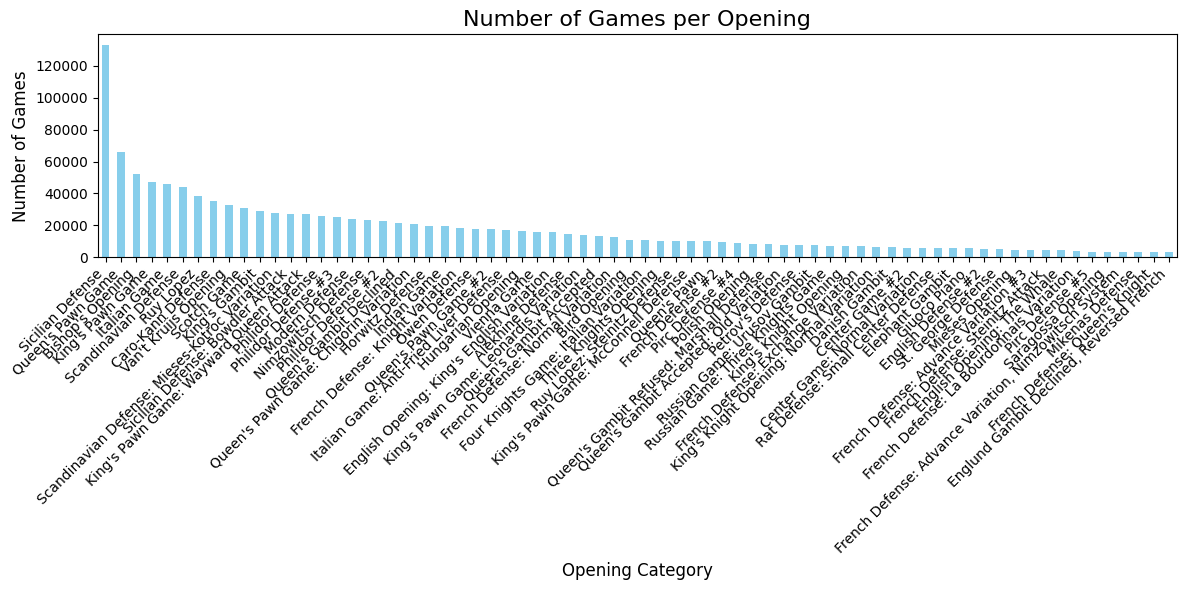

In [26]:
import matplotlib.pyplot as plt

# Count how many games per opening category
opening_counts = final_df['Opening_Category'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
opening_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games per Opening', fontsize=16)
plt.xlabel('Opening Category', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
ratio_df = final_df.groupby("Opening_Category").agg(
    games=("Opening_Category", "count"),
    win_rate=("output", "mean"),
    avg_white_elo=("WhiteElo", "mean"),
    Band=("Band", lambda x: x.mode()[0])  # most frequent band for this opening
).sort_values("games", ascending=False)


ratio_df.head()

,games,win_rate,avg_white_elo,Band
Opening_Category,,,,
Sicilian Defense,133151,0.457466,1765.999925,Intermediate
Queen's Pawn Game,65914,0.481977,1682.432078,Intermediate
Bishop's Opening,52063,0.526516,1662.169967,Intermediate
King's Pawn Game,47335,0.491729,1569.688180,Novice
Italian Game,46012,0.519278,1711.751152,Intermediate


In [30]:
import plotly.express as px
import numpy as np

# Reset index if Opening_Category is the index
df_plot = ratio_df.reset_index()

# Scale bubble sizes using log for skewed data
df_plot['size'] = np.log(df_plot['games'])

# Choose top openings to annotate (largest by games)
top_openings = df_plot.nlargest(15, "games")

# Interactive bubble plot
fig = px.scatter(
    df_plot,
    x='avg_white_elo',
    y='win_rate',
    size='size',
    color='Band',  # colors by player strength
    hover_name='Opening_Category',
    hover_data={'games': True, 'avg_white_elo': True, 'win_rate': True, 'size': False},
    opacity=0.7,
    size_max=40
)

# Annotate top openings
for _, row in top_openings.iterrows():
    fig.add_annotation(
        x=row['avg_white_elo'],
        y=row['win_rate'],
        text=row['Opening_Category'],
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowcolor='black',
        font=dict(size=10)
    )

fig.update_layout(
    title="Opening Performance vs Player Strength",
    xaxis_title="Average White Elo",
    yaxis_title="White Win Rate",
    legend_title="Player Band",
    template="plotly_white"
)

fig.show()


<Axes: xlabel='Opening_Category'>

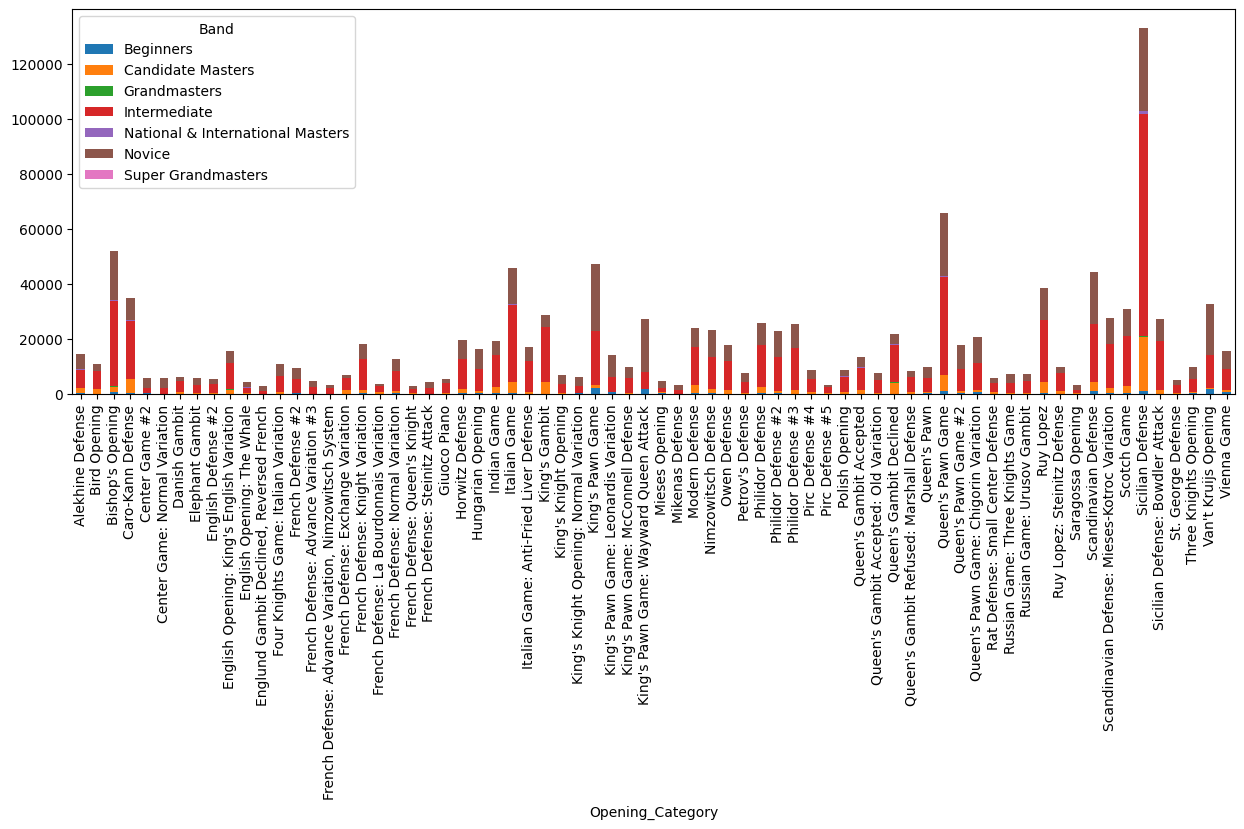

In [31]:
df_band_counts = final_df.groupby(['Opening_Category','Band']).size().unstack(fill_value=0)
df_band_counts.plot(kind='bar', stacked=True, figsize=(15,5))


In [40]:
# Features: Opening_Category (categorical), WhiteElo, BlackElo
X = final_df[['Opening_Category', 'WhiteElo', 'BlackElo']]
y = final_df['output']  # 1 if White wins, 0 if not


In [48]:
final_df.columns.tolist()

['Event',
 'White',
 'Black',
 'Result',
 'UTCDate',
 'UTCTime',
 'WhiteElo',
 'BlackElo',
 'WhiteRatingDiff',
 'BlackRatingDiff',
 'ECO',
 'Opening',
 'TimeControl',
 'Termination',
 'AN',
 'output',
 'Band',
 'Opening_Category']

I will reduce most of my columns as they are noise and dont really help with the LogisticRegression

In [50]:
model_df = final_df[['Opening_Category', 'Band', 'output']].copy().reset_index(drop=True)
model_df.head()

,Opening_Category,Band,output
0,Italian Game,Intermediate,0
1,Philidor Defense #3,Intermediate,1
2,Italian Game,Intermediate,1
3,Four Knights Game: Italian Variation,Novice,0
4,Italian Game,Novice,0


In [53]:
print(model_df.isna().sum())
print(model_df.describe())


Opening_Category    0
Band                0
output              0
dtype: int64
             output
count  1.248102e+06
mean   4.999055e-01
std    5.000002e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00


In [74]:
import matplotlib.pyplot as plt

# Count outcomes
outcome_counts = model_df['output'].value_counts().sort_index()

# Map labels for clarity
outcome_counts

output
0    624169
1    623933
Name: count, dtype: int64

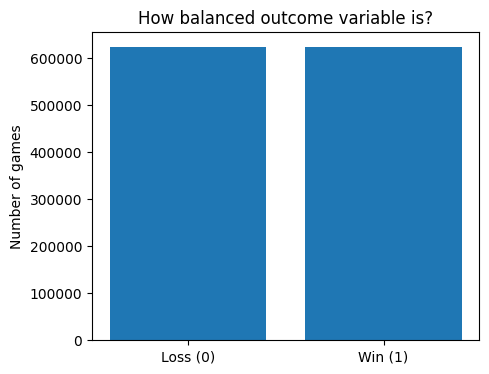

In [76]:
import matplotlib.pyplot as plt

counts = model_df['output'].value_counts().sort_index()

plt.figure(figsize=(5,4))
plt.bar(['Loss (0)', 'Win (1)'], counts.values)
plt.ylabel("Number of games")
plt.title("How balanced outcome variable is?")
plt.show()


## Logistic regression modelling 

In [54]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt


In [ ]:
X = model_df[['Opening_Category', 'Band']]
y = model_df['output']




,Opening_Category,Band
0,Italian Game,Intermediate
1,Philidor Defense #3,Intermediate
2,Italian Game,Intermediate
3,Four Knights Game: Italian Variation,Novice
4,Italian Game,Novice
...,...,...
1248097,King's Pawn Game,Novice
1248098,Scotch Game,Novice
1248099,Modern Defense,Intermediate
1248100,King's Knight Opening,Novice


In [70]:
categorical_features = ['Opening_Category', 'Band']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. ``""{feature_na

In [57]:
from sklearn.model_selection import train_test_split


In [78]:
df_train, df_test = train_test_split(
    model_df,
    test_size=0.3,
    random_state=1234,
    stratify=model_df['output']
)
df_train.head(5)

,Opening_Category,Band,output
20263,Italian Game: Anti-Fried Liver Defense,Novice,0
131511,Nimzowitsch Defense,Intermediate,1
638743,King's Pawn Game,Intermediate,0
792397,Bishop's Opening,Novice,0
1112677,Italian Game: Anti-Fried Liver Defense,Novice,1


In [81]:
print(f'this is the train count: {df_train["output"].value_counts(normalize=True)}')
print(f'this is the test count: {df_test["output"].value_counts(normalize=True)}')


this is the train count: output
0    0.500094
1    0.499906
Name: proportion, dtype: float64
this is the test count: output
0    0.500095
1    0.499905
Name: proportion, dtype: float64


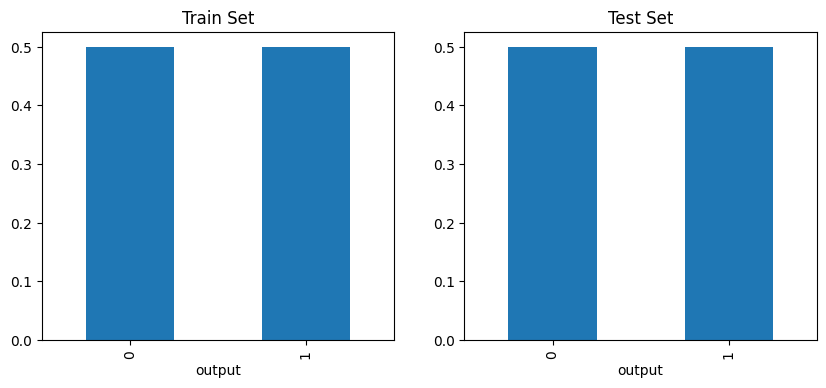

In [90]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,4))  # 1 row, 2 columns

# Bar chart for train
df_train["output"].value_counts(normalize=True).plot(kind='bar', ax=axs[0])
axs[0].set_title("Train Set")


# Bar chart for test
df_test['output'].value_counts(normalize=True).plot(kind='bar', ax=axs[1])
axs[1].set_title("Test Set")


plt.show()


In [96]:
X_train = df_train.drop('output', axis=1)
X_test = df_test.drop('output', axis=1)


y_train = df_train['output']
y_test = df_test['output']

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(374431, 2)
(873671, 2)
(374431,)
(873671,)


In [97]:
X_train.head()

,Opening_Category,Band
20263,Italian Game: Anti-Fried Liver Defense,Novice
131511,Nimzowitsch Defense,Intermediate
638743,King's Pawn Game,Intermediate
792397,Bishop's Opening,Novice
1112677,Italian Game: Anti-Fried Liver Defense,Novice


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        solver='lbfgs'
    ))
])


In [100]:
log_reg.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sp

In [ ]:
y_pred = log_reg.predict(X_test)

y_pred


array([1, 1, 0, ..., 0, 0, 1], shape=(374431,))

## Assessing model

In [104]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
balanced_score = metrics.balanced_accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Balanced Accuracy: {balanced_score:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.5584
Balanced Accuracy: 0.5584
F1 Score: 0.5669


              precision    recall  f1-score   support

           0       0.56      0.54      0.55    187251
           1       0.56      0.58      0.57    187180

    accuracy                           0.56    374431
   macro avg       0.56      0.56      0.56    374431
weighted avg       0.56      0.56      0.56    374431



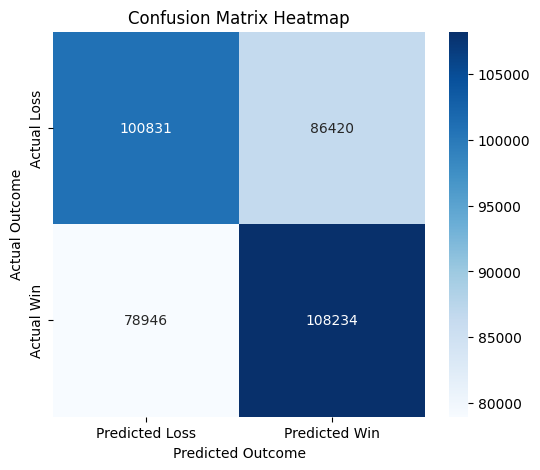

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
cm


cr = classification_report(y_test, y_pred)
print(cr)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Loss','Predicted Win'], 
            yticklabels=['Actual Loss','Actual Win'])
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.title('Confusion Matrix Heatmap')
plt.show()

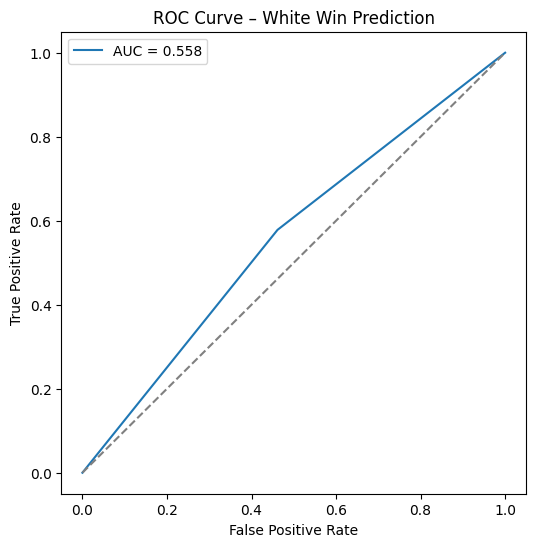

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
auc = roc_auc_score(y_test, y_pred)
auc
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – White Win Prediction")
plt.legend()
plt.show()


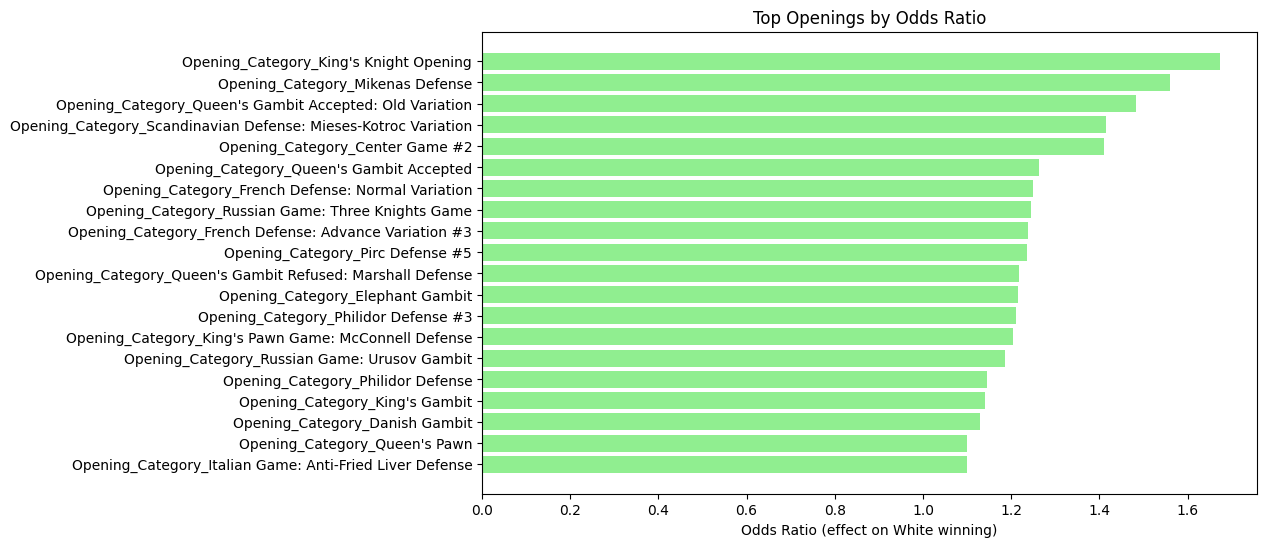

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature names after one-hot encoding
feature_names = log_reg.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_features)

# Get coefficients from the logistic regression
coefficients = log_reg.named_steps['classifier'].coef_[0]

# Create a dataframe
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefficients,
    'odds_ratio': np.exp(coefficients)
})

# Filter only opening features (exclude Band_)
coef_df = coef_df[~coef_df['feature'].str.startswith('Band_')]

# Sort by odds ratio descending
coef_df = coef_df.sort_values('odds_ratio', ascending=False)

# Take top 20 openings for clarity
top_openings = coef_df.head(20)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_openings['feature'], top_openings['odds_ratio'], color='lightgreen')
plt.xlabel('Odds Ratio (effect on White winning)')
plt.title('Top Openings by Odds Ratio')
plt.gca().invert_yaxis()  # Highest odds ratio on top
plt.show()


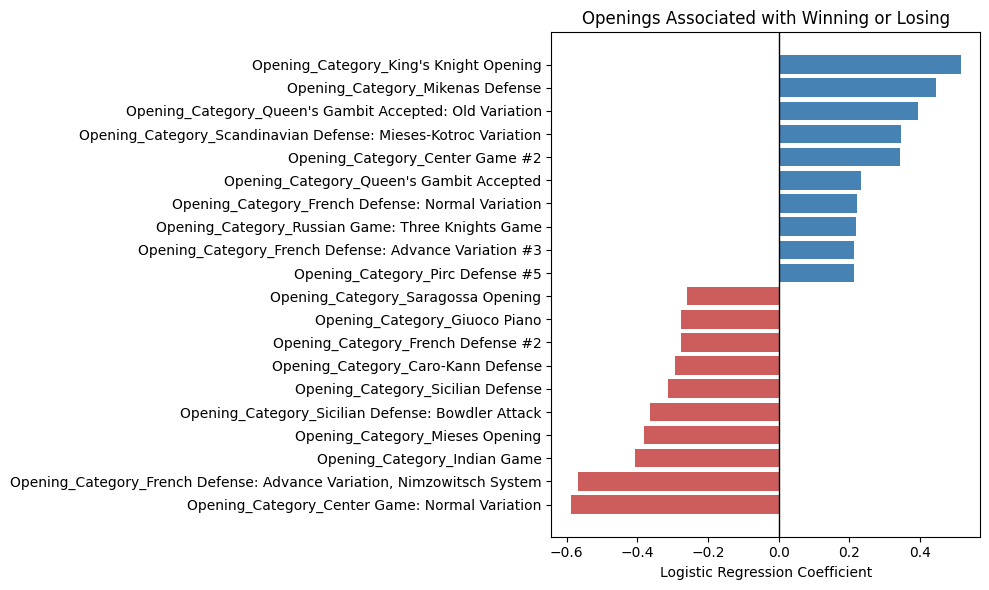

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature names after one-hot encoding
feature_names = log_reg.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_features)

# Get coefficients
coefficients = log_reg.named_steps['classifier'].coef_[0]

# Create dataframe
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefficients,
    'odds_ratio': np.exp(coefficients)
})

# Filter only opening features
coef_df = coef_df[~coef_df['feature'].str.startswith('Band_')]

# Sort by coefficient (NOT odds ratio)
coef_df = coef_df.sort_values('coef')

# Take strongest effects in both directions
top_openings = pd.concat([
    coef_df.head(10),   # most negative
    coef_df.tail(10)    # most positive
])

# Plot COEFFICIENTS
plt.figure(figsize=(10, 6))
plt.barh(
    top_openings['feature'],
    top_openings['coef'],
    color=top_openings['coef'].apply(
        lambda x: 'steelblue' if x > 0 else 'indianred'
    )
)

plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Logistic Regression Coefficient')
plt.title('Openings Associated with Winning or Losing')
plt.tight_layout()
plt.show()


In [134]:
coef_df

,feature,coef,odds_ratio
28,Opening_Category_King's Knight Opening,0.514908,1.673484
35,Opening_Category_Mikenas Defense,0.444856,1.560265
47,Opening_Category_Queen's Gambit Accepted: Old ...,0.393933,1.482802
61,Opening_Category_Scandinavian Defense: Mieses-...,0.347553,1.415600
3,Opening_Category_Center Game #2,0.344279,1.410973
...,...,...,...
64,Opening_Category_Sicilian Defense: Bowdler Attack,-0.363952,0.694925
34,Opening_Category_Mieses Opening,-0.381454,0.682868
24,Opening_Category_Indian Game,-0.407855,0.665075
14,Opening_Category_French Defense: Advance Varia...,-0.569065,0.566055


## Result

The logistic regression results indicate meaningful differences in winning odds across chess opening categories relative to the reference opening. Positive coefficients correspond to openings associated with higher odds of winning, while negative coefficients indicate reduced odds. For example, the King’s Knight Opening shows a strong positive association with winning (β = 0.51, OR = 1.67), implying approximately 67% higher odds of success, whereas the Center Game: Normal Variation exhibits the strongest negative association (β = −0.59, OR = 0.56), corresponding to roughly 44% lower odds of winning. Other openings, such as the Mikenas Defense and the Queen’s Gambit Accepted: Old Variation, also demonstrate favorable associations, though of smaller magnitude, while openings like the French Defense: Advance Variation and the Indian Game are associated with lower winning odds. Overall, the coefficients capture the direction and relative strength of each opening’s association with winning, while the odds ratios translate these effects into an interpretable multiplicative scale; these results should be interpreted as associative rather than causal.

### Key Points

- ** Coefficient (β) indicate direction and strength:**
  - Positive → higher odds of winning
  - Negative → lower odds of winning

- **Odds ratios (OR) provide intuitive magnitude:**
  - OR > 1 → increased winning odds
  - OR < 1 → decreased winning odds

- **Strongest positive association:**
  - King’s Knight Opening (OR ≈ 1.67 → ~67% higher odds)

- **Strongest negative association:**
  - Center Game: Normal Variation (OR ≈ 0.56 → ~44% lower odds)

- **Interpretation note:**
  - Results reflect **associations**, not causal effects
  - May capture differences in player skil


### 